In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Chi-Square Distribution
The Chi-Square Distribution is "defined" as follows (in my opinion lol)

Let $X_1 \sim N(1, 0)$, $X_2 \sim N(1, 0)$, and so on until $X_n \sim N(1,0)$
assume that they're all independent of each other
Then 
$$
\chi^2_n \sim X_1^2 + X_2^2 + \cdots + X_n^2
$$

# Deriving the PDF of $\chi^2$

- It is known that $X \sim N(1, 0) \implies X$ has the pdf of $f(x) = \frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}x^2}$
- Let $Y \sim X^2$
- $P(0 < Y < y) = P(0 < X^2 < y) = P(-\sqrt{y} < X < \sqrt{y}) = 1 - 2P(X < -\sqrt{y}) = 1 - 2\int_{-\infty}^{-\sqrt{y}}\left(\frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}t^2}\right) dt = 1 - 2(F(-\sqrt{y}) - \lim_{t \rightarrow -\infty}F(t))$
- $\frac{d}{dy}\left(P(0 < Y < y)\right) = 2 \frac{1}{2\sqrt{y}}f(-\sqrt{y}) = \boxed{\frac{1}{\sqrt{y}}\frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}y}}$

For $\chi^2_n$, idk... gotta do a whole buncha convolutions... maybe induction... either way it's too complicated.

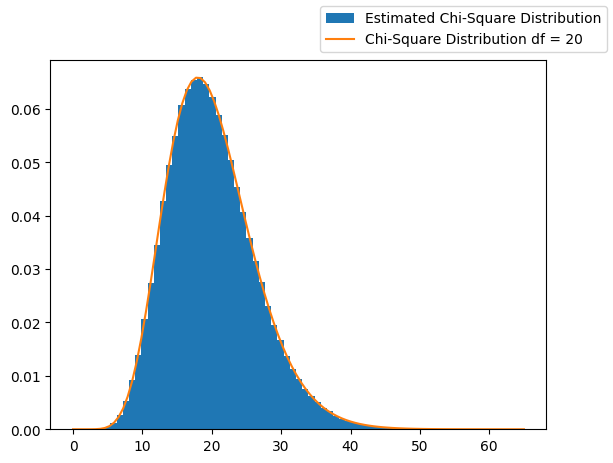

In [3]:
df = 20

my_chi2_dist = stats.chi2(df=df)

fig, ax = plt.subplots(nrows=1, ncols=1)


# Generating values based on the definition of the normal distribution
runs = 1_000_000

my_norm_dist = stats.norm(0, 1)
generated_chi2 = np.sum((my_norm_dist.rvs(size=(runs, df))**2), axis=1)

x_values = np.linspace(0, np.ceil(np.max(generated_chi2)), 100)
ax.hist(generated_chi2, density=True, label="Estimated Chi-Square Distribution", bins=69)

ax.plot(x_values, my_chi2_dist.pdf(x_values), label=f"Chi-Square Distribution df = {df}")
fig.legend()


# Justifying That Sample Variance of Normal Distributed Random Variable Is $\chi^2$

## State
Let $X \sim N(\mu, \sigma^2)$ and $Z \sim N(0, 1)$ 

To begin with, let's take $n$ samples and call it $X_1, X_2, \dots, X_n$

Now we're basically trying to find the distribution of $s^2 = \frac{1}{n-1}\times\sum_{i = 1}^n(X_i - \bar{X})^2$

From the definition of the chi-square distribution

$$
\begin{align*}
&\chi^2_n \sim Z_1^2 + Z_2^2 + \cdots + Z_n^2\\
&\chi^2_n \sim \sum_{i=1}^n{Z_i^2}\\
&\chi^2_n \sim \sum_{i=1}^n{\left(\frac{X_i - \mu}{\sigma}\right)^2}\\
&\text{To somehow get }s^2 \text{ into the equation, we'll do something weird}\\
&\chi^2_n \sim \sum_{i=1}^n{\left(\frac{X_i -\bar{X} + \bar{X} - \mu}{\sigma}\right)^2}\\
&\chi^2_n \sim \sum_{i=1}^n{\left(\frac{X_i -\bar{X}}{\sigma}\right)^2 + 2\sum_{i=1}^n\frac{1}{\sigma^2}(X_i - \bar{X})(\bar{X} - \mu) + \sum_{i=1}^n(\frac{\bar{X} - \mu}{\sigma})^2}\\

&\chi^2_n \sim \frac{n-1}{n-1}\sum_{i=1}^n{\left(\frac{X_i -\bar{X}}{\sigma}\right)^2 + 2\sum_{i=1}^n\frac{1}{\sigma^2}(X_i - \bar{X})(\bar{X} - \mu) + \sum_{i=1}^n(\frac{\bar{X} - \mu}{\sigma})^2}\\
&\chi^2_n \sim \frac{(n-1)s^2}{\sigma^2} + \underbrace{2\sum_{i=1}^n\frac{1}{\sigma^2}(X_i - \bar{X})(\bar{X} - \mu)}_{=0} + \sum_{i=1}^n(\frac{\bar{X} - \mu}{\sigma})^2\\

&\chi^2_n \sim \frac{(n-1)s^2}{\sigma^2} + n(\frac{\bar{X} - \mu}{\sigma})^2\\
&\chi^2_n \sim \frac{(n-1)s^2}{\sigma^2} + (\frac{\bar{X} - \mu}{\sigma/n})^2\\
&\chi^2_n \sim \frac{(n-1)s^2}{\sigma^2} + Z^2\\

&\implies \boxed{\chi^2_{n-1} \sim \frac{(n-1)s^2}{\sigma^2}}\\




\end{align*}
$$





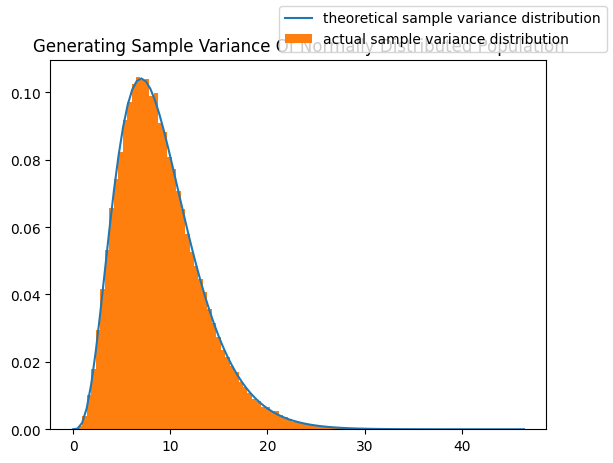

In [30]:
# generating runs amount of trials of n samples
runs = 100_000
n = 10

var = 2
mean = 100
# population distribution

my_norm_dist = stats.norm(mean, var**0.5)

# generating random samples from the population and calculating its variance and scaling it to fit the chi square dist

scaled_var = np.var(my_norm_dist.rvs(size=(runs, n)), axis=1, ddof=1)*(n-1)/var

# theoretical distribution of variance

my_chi2_dist = stats.chi2(df=n-1)

# plotting the graphs

fig, ax = plt.subplots(1,1)

ax.set_title("Generating Sample Variance Of Normally Distributed Population")

x_values = np.linspace(0, np.max(scaled_var), 100)

ax.plot(x_values, my_chi2_dist.pdf(x_values), label="theoretical sample variance distribution")

ax.hist(scaled_var, density=True, label="actual sample variance distribution", bins=100)

fig.legend()